In [1]:
# DATA

import yfinance as yf
import numpy as np
import matplotlib as mp
import pandas as pd
import os

In [2]:
# Etsy is a global online marketplace, where people come together to make, sell, buy, and collect unique items

ETSY_12M = yf.download("ETSY", start="2020-03-01", end="2021-03-01") 

[*********************100%***********************]  1 of 1 completed


In [3]:
ETSY_12M.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-02,58.020000,59.790001,56.910000,58.840000,58.840000,5572800
2020-03-03,58.919998,59.930000,56.820000,58.209999,58.209999,4053300
2020-03-04,59.080002,63.145000,57.849998,62.459999,62.459999,4779100
2020-03-05,61.009998,63.240002,60.830002,62.130001,62.130001,3514100
2020-03-06,60.500000,62.880001,59.250000,60.650002,60.650002,3726300


In [4]:
ETSY_12M.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-22,222.860001,225.660004,211.750000,213.119995,213.119995,2652200
2021-02-23,203.070007,211.919006,191.000000,210.750000,210.750000,3646100
2021-02-24,209.990005,212.878006,202.264999,209.100006,209.100006,2179000
2021-02-25,205.085007,214.000000,194.770004,197.580002,197.580002,3698700
2021-02-26,224.000000,232.289993,206.369995,220.270004,220.270004,11043400


In [5]:
ETSY_12M['Adj Close'].tail(130) # ETSY_6M 

Date
2020-08-21    130.369995
2020-08-24    128.740005
2020-08-25    125.480003
2020-08-26    126.910004
2020-08-27    122.370003
                 ...    
2021-02-22    213.119995
2021-02-23    210.750000
2021-02-24    209.100006
2021-02-25    197.580002
2021-02-26    220.270004
Name: Adj Close, Length: 130, dtype: float64

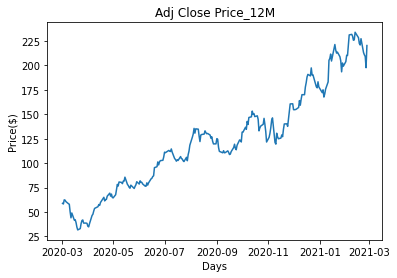

In [6]:
import matplotlib.pyplot as plt # Movement of the stock Adj Close price (12M)
fig = plt.figure()
plt.plot(ETSY_12M['Adj Close'])
plt.xlabel('Days')
plt.ylabel('Price($)')
plt.title('Adj Close Price_12M');

In [7]:
log_return_12M = np.log(ETSY_12M['Adj Close'] / ETSY_12M['Adj Close'].shift(1))
log_return_12M[:5]

Date
2020-03-02         NaN
2020-03-03   -0.010765
2020-03-04    0.070469
2020-03-05   -0.005297
2020-03-06   -0.024109
Name: Adj Close, dtype: float64

In [8]:
ETSY_12Mvol = log_return_12M.std() * np.sqrt(252)
print('The annualised volatility over 12 months is', round(ETSY_12Mvol * 100,2), '%')

The annualised volatility over 12 months is 73.93 %


In [9]:
ETSY_6Mvol = log_return_12M[130:-1].std() * np.sqrt(252)
print('The annualised volatility over last 6 months is', round(ETSY_6Mvol * 100,2), '%')

The annualised volatility over last 6 months is 64.48 %


In [10]:
# Cash-or-Nothing Binary put option (ETSY)
# Pricing methods

# 1 Binomial Tree Method

S0 =215 # dated 21-03-2021
K = 200
T = 2/12
r = 0.0171 # dated 21-03-2021
sigma = 0.65 # from calculated volatility (prior 6M period)
N = 10
payoff = "put"

In [11]:
dT = float(T) / N
u = np.exp(sigma * np.sqrt(dT))
d = 1 / u

In [12]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1
S

array([[215.        , 233.82025223, 254.28795512, 276.54732002,
        300.75518195, 327.08210466, 355.71358237, 386.85134675,
        420.71478823, 457.54250186, 497.59396832],
       [  0.        , 197.69459472, 215.        , 233.82025223,
        254.28795512, 276.54732002, 300.75518195, 327.08210466,
        355.71358237, 386.85134675, 420.71478823],
       [  0.        ,   0.        , 181.78210595, 197.69459472,
        215.        , 233.82025223, 254.28795512, 276.54732002,
        300.75518195, 327.08210466, 355.71358237],
       [  0.        ,   0.        ,   0.        , 167.1504175 ,
        181.78210595, 197.69459472, 215.        , 233.82025223,
        254.28795512, 276.54732002, 300.75518195],
       [  0.        ,   0.        ,   0.        ,   0.        ,
        153.69643742, 167.1504175 , 181.78210595, 197.69459472,
        215.        , 233.82025223, 254.28795512],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 141.32537165, 153.6

In [13]:
a = np.exp(r * dT)    # risk-free rate (compounded)
p = (a - d)/ (u - d)  # up
q = 1 - p           # down
p

0.480730046565738

In [14]:
S_T = S[:,-1]
S_T

array([497.59396832, 420.71478823, 355.71358237, 300.75518195,
       254.28795512, 215.        , 181.78210595, 153.69643742,
       129.95005614, 109.8725343 ,  92.89702638])

In [15]:
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.heaviside(S_T - K >0, 0.0)
elif payoff =="put":
    V[:,-1] = np.heaviside(K - S_T >0, 0.0)
V

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [16]:
for j in range(N - 1, -1, -1):
    for i in range(j + 1):
        V[i, j] = np.exp(- r * dT) * (p * V[i, j + 1] + q * V[i + 1, j + 1])
V

array([[0.42398252, 0.292514  , 0.17090573, 0.07600016, 0.01957116,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.54592626, 0.40525716, 0.25886128, 0.12828275,
        0.0377005 , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.67645466, 0.54101008, 0.37989044,
        0.21221245, 0.07262358, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.80221796, 0.69046848,
        0.53533201, 0.3415576 , 0.13989695, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.90611381,
        0.83446983, 0.71501845, 0.52843861, 0.26948763, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.97293782, 0.94551365, 0.88814294, 0.76846047, 0.51912198,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.

In [17]:
print('Binary ' + payoff, str( V[0,0]))

Binary put 0.4239825234127897


In [18]:
# 2 MONTE CARLO SIMULATION 

def mcs_simulation_np(m,n):  # m is 10 STEPS and n is 10000 simulations
    M = m
    I = n
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [19]:
S = mcs_simulation_np(10,10000)

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-period values')

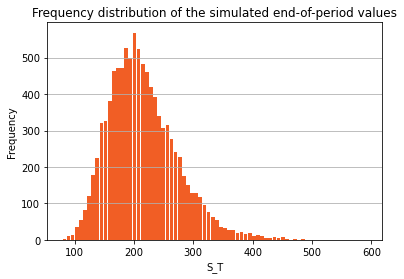

In [20]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[-1,:], bins='auto', color='#f15e25',alpha=1.0, rwidth=0.90)

plt.grid(axis='y', alpha=1.0)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-period values')

In [21]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Monte Carlo: Binary put', str(bpp))

Monte Carlo: Binary put 0.4393


In [22]:
# 3 BLACK-SCHOLES METHOD

import scipy.stats as si

In [23]:
def binary_option_BS(S, K, T, r, sigma, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        option_value = np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) # binary call option value
    elif payoff == "put":
        option_value = np.exp(-r * T) * (1 - si.norm.cdf(d2, 0.0, 1.0)) # binary put option value
    
    return option_value

In [24]:
pp = binary_option_BS(215, 200, 2/12, 0.0171, 0.65, "put")
pp

0.4388946273399334

In [25]:
cp = binary_option_BS(215, 200, 2/12, 0.0171, 0.65, "call")
cp

0.5582594300546264

In [26]:
pp + cp # Put-Call Parity

0.9971540573945599

In [27]:
S = np.linspace(100,350,10)
T = [1/252, 3/252, 1/52, 1/12, 2/12] 

In [28]:
pp = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        pp[i,j] = binary_option_BS(S[j], 200, T[i], 0.0171, 0.65, "put")

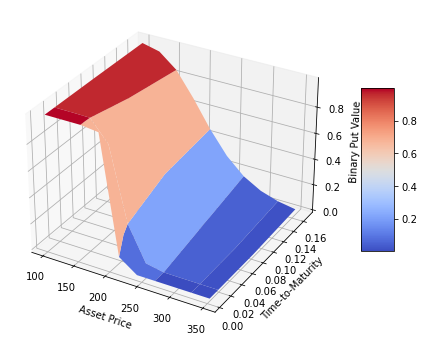

In [29]:
# Binary put option value

Asset_Price, TTM = np.meshgrid(S, T)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Asset_Price, TTM, pp, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Asset Price')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary Put Value')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [30]:
# ANALYSIS

# GREEKS

# DELTA: rate of change of hypothetical option value with respect to changes in the underlying asset price

def delta(S, K, T, r, sigma, payoff):
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / (sigma * (S) * np.sqrt(T))
    elif payoff == "put":
        delta = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / (sigma * (S) * np.sqrt(T))
    return delta

In [31]:
delta(215, 200, 2/12, 0.0171, 0.65, "put")

-0.006894002363115719

In [32]:
S = np.linspace(100,350,10)
T = [1/252, 3/252, 1/52, 1/12, 2/12] 

In [33]:
Delta_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Delta_Put[i,j] = delta(S[j], 200, T[i], 0.0171, 0.65, "put") 

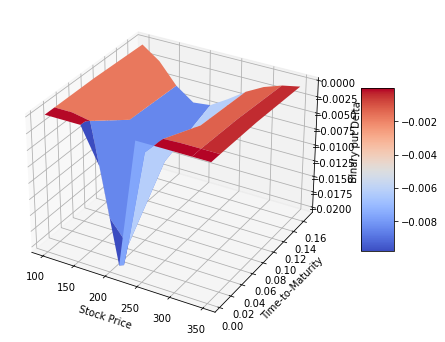

In [34]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Stock, TTM, Delta_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary put Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [35]:
# GAMMA: rate of change in the delta with respect to changes in the underlying price

def gamma(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        gamma = - np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 2)) * (np.sqrt(T))
    elif payoff == "put":
        gamma = np.exp(-r * T) * d1 * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 2)) * (np.sqrt(T))
    return gamma

In [36]:
gamma(215, 200, 2/12, 0.0171, 0.65, "put")

3.4199288015154507e-06

In [37]:
S = np.linspace(50,450,10)
T = [1/252, 3/252, 1/52, 1/12, 2/12]

In [38]:
Gamma_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Gamma_Put[i,j] = gamma(S[j], 200, T[i], 0.0171, 0.65, "put") 

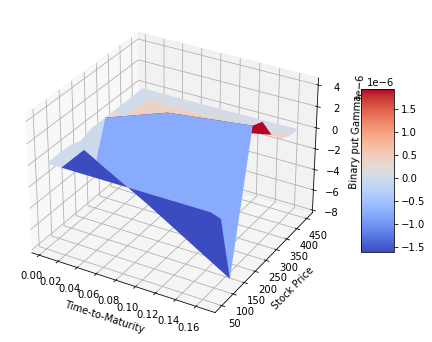

In [39]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(TTM, Stock, Gamma_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Time-to-Maturity')
ax.set_ylabel('Stock Price')
ax.set_zlabel('Binary put Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [40]:
S = np.linspace(50,450,10)
Gamma_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma_Put[i] = gamma(S[i], 200, 2/12, 0.0171, 0.65, "put") 

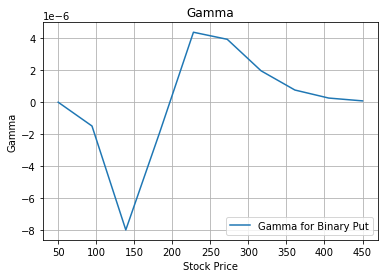

In [41]:
# gamma detail at expiry 

fig = plt.figure()
plt.plot(S, Gamma_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Binary Put'])

In [42]:
# THETA: measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay"

def theta(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        theta = (r * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) + np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) * ((d1 / 2 * T) - (r / sigma * np.sqrt(T)))
    elif payoff == "put":
        theta = (r * np.exp(-r * T) * (1 - si.norm.cdf(d2, 0.0, 1.0)) - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)) * ((d1 / 2 * T) - (r / sigma * np.sqrt(T)))
    return theta

In [43]:
theta(215, 200, 2/12, 0.0171, 0.65, "put")

-0.009229897510438213

In [44]:
T = [1/252, 3/252, 1/52, 1/12, 2/12]
S = np.linspace(150,350,10)

In [45]:
Theta_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Theta_Put[i,j] = theta(S[j], 200, T[i], 0.0171, 0.65, "put")

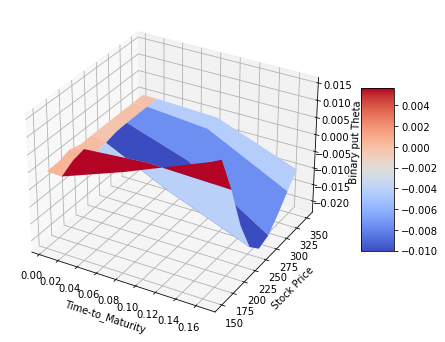

In [46]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(TTM, Stock, Theta_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Time-to_Maturity')
ax.set_ylabel('Stock Price')
ax.set_zlabel('Binary put Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [47]:
# SPEED: measures the rate of change in Gamma with respect to changes in the underlying price

def speed(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        speed = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 3) * np.sqrt(T)) * ((-2 * d1) + (1 - (d1 * d2)) / (sigma * np.sqrt(T)))
    elif payoff == "put":
        speed = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) / ((sigma ** 2) * (S ** 3) * np.sqrt(T)) * ((-2 * d1) + (1 - (d1 * d2)) / (sigma * np.sqrt(T)))
    return speed

In [48]:
speed(215, 200, 2/12, 0.0171, 0.65, "put")

6.196130662066171e-07

In [49]:
S = np.linspace(50,400,10)
T = [1/252, 3/252, 1/52, 1/12, 2/12]

In [50]:
Speed_Put = np.zeros((len(T),len(S)))
for i in range(len(T)):
    for j in range(len(S)):
        Speed_Put[i,j] = speed(S[j], 200, T[i], 0.0171, 0.65, "put") 

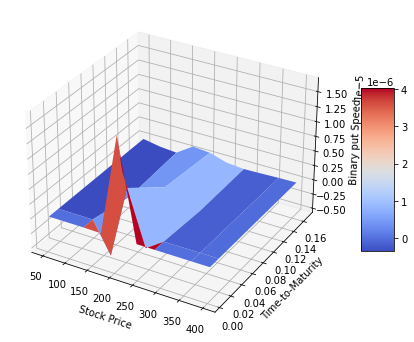

In [51]:
Stock, TTM = np.meshgrid(S, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Stock, TTM, Speed_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary put Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [52]:
S = np.linspace(50,400,10)
Speed_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Speed_Put[i] = speed(S[i], 200, 2/12, 0.0171, 0.65, "put") 

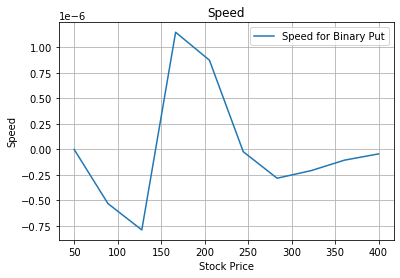

In [53]:
# speed detail at expiry 

fig = plt.figure()
plt.plot(S, Speed_Put, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Binary Put'])

In [54]:
# VEGA: measures sensitivity to volatility

def vega(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        vega = - np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (d1 / sigma)
    elif payoff == "put":
        vega = np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0) * (d1 / sigma)
    return vega

In [55]:
vega(215, 200, 2/12, 0.0171, 0.65, "put")

0.25169985558489266

In [56]:
sigma = np.linspace(0.10,1,10)
T = [1/252, 3/252, 1/52, 1/12, 2/12] 

In [57]:
Vega_Put = np.zeros((len(T),len(sigma)))
for i in range(len(T)):
    for j in range(len(sigma)):
        Vega_Put[i,j] = vega(215, 200, T[i], 0.0171, sigma[j], "put") 

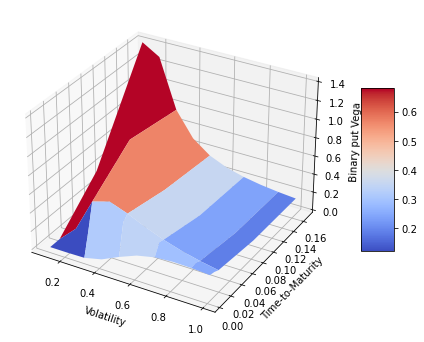

In [58]:
Vol, TTM = np.meshgrid(sigma, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(Vol, TTM, Vega_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Volatility')
ax.set_ylabel('Time-to-Maturity')
ax.set_zlabel('Binary put Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [59]:
# RHO: measures sensitivity to the interest rate

def rho(S, K, T, r, sigma, payoff):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    if payoff == "call":
        rho =  - T * np.exp(-r * T) * si.norm.cdf(d2) + ((np.sqrt(T) / sigma) * (np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)))
    elif payoff == "put":
        rho =  - T * np.exp(-r * T) * (1 - si.norm.cdf(d2)) - ((np.sqrt(T) / sigma) * (np.exp(-r * T) * si.norm.pdf(d2, 0.0, 1.0)))
    return rho

In [60]:
rho(215, 200, 2/12, 0.0171, 0.65, "put")

-0.3201841892349688

In [61]:
r = np.linspace(0,0.03,10)
T = [1/252, 3/252, 1/52, 1/12, 2/12]

In [62]:
Rho_Put = np.zeros((len(T),len(r)))
for i in range(len(T)):
    for j in range(len(r)):
        Rho_Put[i,j] = rho(215, 200, T[i], r[j], 0.65, "put") 

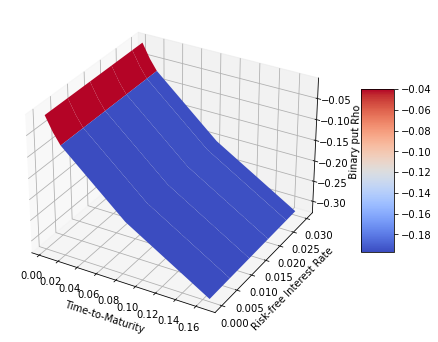

In [63]:
Int, TTM = np.meshgrid(r, T)
fig = plt.figure(figsize= (10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(TTM, Int, Rho_Put, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Time-to-Maturity')
ax.set_ylabel('Risk-free Interest Rate')
ax.set_zlabel('Binary put Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);